In [1]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simple Example 

In [9]:
# Create a dataset of 100 rows and 10 features.
rows = 100
n_features = 10
np.random.seed(0)
features = np.random.randint(0,10,size=[rows,n_features])
# Target is a binary variable
target = np.random.randint(0,2,size=rows)

data = pd.DataFrame(features)
data['target'] = target
print('The size of the resulted dataset ', data.shape)

The size of the resulted dataset  (100, 11)


In [10]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,target
0,5,0,3,3,7,9,3,5,2,4,1
1,7,6,8,8,1,6,7,7,8,1,0
2,5,9,8,9,4,3,0,3,5,0,1
3,2,3,8,1,3,3,3,7,0,1,0
4,9,9,0,4,7,3,2,7,2,0,0
5,0,4,5,5,6,8,4,1,4,9,0
6,8,1,1,7,9,9,3,6,7,2,1
7,0,3,5,9,4,4,6,4,4,3,1
8,4,4,8,4,3,7,5,5,0,1,0
9,5,9,3,0,5,0,1,2,4,2,0


In [12]:
def countSplitExamples(data, n_splits, shuffle, random_state, verbose=False):
    # Creating k-fold splitting 
    kfold = KFold(n_splits, shuffle, random_state)
    sizes = [0 , 0]
    for train, test in kfold.split(data):
        if verbose:
            print('train: indexes %s, val: indexes %s, size (training) %d, (val) %d' % (train, test, train.shape[0], test.shape[0]))
        sizes[0] += train.shape[0]
        sizes[1] += test.shape[0]
        
    return int(sizes[0]/n_splits), int(sizes[1]/n_splits)
        

In [13]:
sizes = countSplitExamples(data.head(10), n_splits=3, shuffle=True, random_state=1, verbose=True)
sizes

train: indexes [0 1 3 5 7 8], val: indexes [2 4 6 9], size (training) 6, (val) 4
train: indexes [2 4 5 6 7 8 9], val: indexes [0 1 3], size (training) 7, (val) 3
train: indexes [0 1 2 3 4 6 9], val: indexes [5 7 8], size (training) 7, (val) 3


(6, 3)

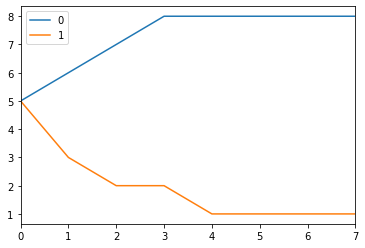

In [14]:
sizes = []
for k in range(2,10):
    sizes.append(countSplitExamples(data.head(10), n_splits=k, shuffle=True, random_state=1))
pd.DataFrame(sizes).plot()

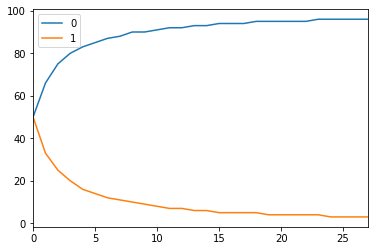

In [15]:
sizes = []
for k in range(2,30):
    sizes.append(countSplitExamples(data, n_splits=k, shuffle=True, random_state=1))
pd.DataFrame(sizes).plot()

# Real Example

In [2]:
# loading the diabetes dataset from Sklearn
X, y = datasets.load_diabetes(return_X_y=True)
X = X[:150]
y = y[:150]

In [3]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [-0.05637009, -0.04464164,  0.09295276, ...,  0.02545259,
         0.02605609,  0.04034337],
       [-0.06000263,  0.05068012,  0.01535029, ..., -0.00259226,
        -0.03075121, -0.0010777 ],
       [-0.04910502,  0.05068012, -0.00512814, ...,  0.07120998,
         0.06123791, -0.03835666]])

In [4]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126.])

In [5]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 0.05968, score: 0.54209
[fold 1] alpha: 0.04520, score: 0.15523
[fold 2] alpha: 0.07880, score: 0.45193

Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.


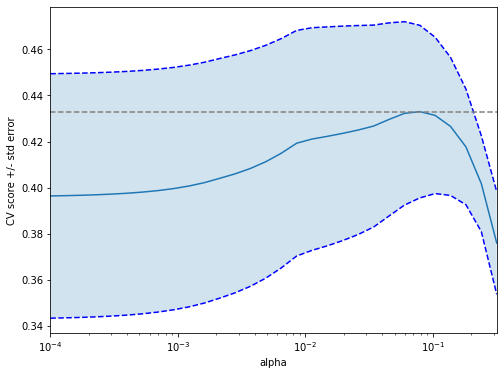

In [6]:
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

# #############################################################################
# Bonus: how much can you trust the selection of alpha?

# To answer this question we use the LassoCV object that sets its alpha
# parameter automatically from the data by internal cross-validation (i.e. it
# performs cross-validation on the training data it receives).
# We use external cross-validation to see how much the automatically obtained
# alphas differ across different cross-validation folds.
lasso_cv = LassoCV(alphas=alphas, random_state=0, max_iter=10000)
k_fold = KFold(3)

print("Answer to the bonus question:",
      "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold.split(X, y)):
    lasso_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))
print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")

plt.show()